# Python Pandas CheetSheet by [Data School](http://www.dataschool.io/)

**YouTube playlist Link** - https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y

**Dataset link** - https://github.com/adiag321/Data-Science-datasets/tree/main

## Table of contents
Here is the formatted list in the format you requested:

1. <a href="#1.-Reading-a-tabular-data-file-into-pandas">Reading a tabular data file into pandas</a>
2. <a href="#2.-Select-a-pandas-Series-from-a-DataFrame-(iloc-and-loc)">Select a pandas Series from a DataFrame? (iloc and loc)</a>
3. <a href="#3.-Some-Basic-Pandas-Command">Some Basic Pandas Command</a>
4. <a href="#4.-Rename-columns">Rename columns</a>
5. <a href="#5.-Remove-columns">Remove columns</a>
6. <a href="#6.-Sorting-Pandas-Dataframe">Sorting Pandas Dataframe</a>
7. <a href="#7.-Filtering-data">Filtering data</a>
8. <a href="#8.-Iterating-series/dataframe-data">Iterating series/dataframe data</a>
9. <a href="#9.-How-do-I-use-the-axis-parameter-in-pandas">How do I use the "axis" parameter in pandas</a>
10. <a href="#10.-String-Methods">String Methods</a>
11. <a href="#11.-Change-Datatypes">Change Datatypes</a>
12. <a href="#12.-Groupby">Groupby</a>
13. <a href="#13.-Exploring-a-non-numeric-Series">Exploring a non-numeric Series -- Categorical Columns</a>
14. <a href="#14.-Unique()-and-nUnique()">Unique() and nUnique()</a>
15. <a href="#15.-CrossTab">CrossTab</a>
16. <a href="#16.-Exploring-a-numeric-Series">Exploring a numeric Series</a>
17. <a href="#17.-Handling-Missing-Values">Handling Missing Values</a>
18. <a href="#18.-Indexing">Indexing</a>
19. <a href="#19.-Creating-dummy-variables">Creating dummy variables</a>
20. <a href="#20.-DateTime-Operations">DateTime Operations</a>
21. <a href="#21.-Remove-duplicate-rows">Remove duplicate rows</a>
22. <a href="#22.-Apply-Function">Apply Function</a>
23. <a href = "#23.-Aggregate-Functions">Aggregate Functions</a>
24. <a href = "#24.-Rank,-shift,-cumsum-functions">Rank, shift, cumsum functions</a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1. Reading a tabular data file into pandas?

In [2]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 2. Select a pandas Series from a DataFrame? (iloc and loc)

In [9]:
ufo = pd.read_csv('https://raw.githubusercontent.com/adiag321/Data-Science-datasets/main/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
ufo[['City']].iloc[:10,:]

,City
0,Ithaca
1,Willingboro
2,Holyoke
3,Abilene
4,New York Worlds Fair
5,Valley City
6,Crater Lake
7,Alma
8,Eklutna
9,Hubbard


In [9]:
# select the 'City' Series using bracket notation
ufo['City']
# or equivalently, use dot notation
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
5                 Valley City
6                 Crater Lake
7                        Alma
8                     Eklutna
9                     Hubbard
10                    Fontana
11                   Waterloo
12                     Belton
13                     Keokuk
14                  Ludington
15                Forest Home
16                Los Angeles
17                  Hapeville
18                     Oneida
19                 Bering Sea
20                   Nebraska
21                        NaN
22                        NaN
23                  Owensboro
24                 Wilderness
25                  San Diego
26                 Wilderness
27                     Clovis
28                 Los Alamos
29               Ft. Duschene
                 ...         
18211                 Holyoke
18212                  Carson
18213     

In [10]:
# create a new 'Location' Series (must use bracket notation to define the Series name)
ufo['Location'] = ufo.City + ', ' + ufo.State
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Location
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,"Ithaca, NY"
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,"Willingboro, NJ"
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,"Holyoke, CO"
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,"Abilene, KS"
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,"New York Worlds Fair, NY"


The [**`loc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method is used to select rows and columns by **label**. You can pass it:

- A single label
- A list of labels
- A slice of labels
- A boolean Series
- A colon (which indicates "all labels")

In [155]:
# row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [157]:
# rows 0 through 2 (inclusive), all columns
ufo.loc[0:2, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [159]:
# rows 0 through 2 (inclusive), column 'City'
ufo.loc[0:2, 'City']

0         Ithaca
1    Willingboro
2        Holyoke
Name: City, dtype: object

In [160]:
# rows 0 through 2 (inclusive), columns 'City' and 'State'
ufo.loc[0:2, ['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO


In [162]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [164]:
# rows in which the 'City' is 'Oakland', column 'State'
ufo.loc[ufo.City=='Oakland', 'State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [165]:
# accomplish the same thing using "chained indexing" - but using 'loc' is preferred since chained indexing can cause problems
ufo[ufo.City=='Oakland'].State

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

The [**`iloc`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) method is used to select rows and columns by **integer position**. You can pass it:

- A single integer position
- A list of integer positions
- A slice of integer positions
- A colon (which indicates "all integer positions")

In [166]:
# rows in positions 0 and 1, columns in positions 0 and 3
ufo.iloc[[0, 1], [0, 3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ


In [167]:
# rows in positions 0 through 2 (exclusive), columns in positions 0 through 4 (exclusive)
ufo.iloc[0:2, 0:4]

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ


In [169]:
# accomplish the same thing - but using 'iloc' is preferred since it's more explicit
ufo[0:2]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


The [**`ix`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ix.html) method is used to select rows and columns by **label or integer position**, and should only be used when you need to mix label-based and integer-based selection in the same call.

In [170]:
# read a dataset of alcohol consumption into a DataFrame and set 'country' as the index
drinks = pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [171]:
# row with label 'Albania', column in position 0
drinks.ix['Albania', 0]

89

In [172]:
# row in position 1, column with label 'beer_servings'
drinks.ix[1, 'beer_servings']

89

**Rules for using numbers with `ix`:**

- If the index is **strings**, numbers are treated as **integer positions**, and thus slices are **exclusive** on the right.
- If the index is **integers**, numbers are treated as **labels**, and thus slices are **inclusive**.

In [173]:
# rows 'Albania' through 'Andorra' (inclusive), columns in positions 0 through 2 (exclusive)
drinks.ix['Albania':'Andorra', 0:2]

,beer_servings,spirit_servings
country,,
Albania,89,132
Algeria,25,0
Andorra,245,138


In [174]:
# rows 0 through 2 (inclusive), columns in positions 0 through 2 (exclusive)
ufo.ix[0:2, 0:2]

,City,Colors Reported
0,Ithaca,NaN
1,Willingboro,NaN
2,Holyoke,NaN


In [23]:
## Filtering by column names
ufo[[c for c in ufo.columns if 'Reported' in c]].head()

,Colors Reported,Shape Reported
0,NaN,TRIANGLE
1,NaN,OTHER
2,NaN,OVAL
3,NaN,DISK
4,NaN,LIGHT


## 3. Some Basic Pandas Command

In [18]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [3]:
#calculate summary statistics
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [12]:
#number of rows and columns
movies.shape

(979, 6)

In [15]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [16]:
# use an optional parameter to the describe method to summarize only 'object' columns
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,The Girl with the Dragon Tattoo,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [16]:
# Counting values (value_counts)
movies.genre.value_counts().head()

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Name: count, dtype: int64

In [15]:
# display percentages instead of raw counts
movies.genre.value_counts(normalize=True).head()

genre
Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Name: proportion, dtype: float64

In [19]:
## Selecting INTEGER datatypes
movies.select_dtypes('int').head()

,duration
0,142
1,175
2,200
3,152
4,154


## ```4. Rename columns```

In [ ]:
ufo = pd.read_csv('https://raw.githubusercontent.com/adiag321/Data-Science-datasets/main/ufo.csv')
ufo.head()

#### 4.1. rename two of the columns by using the 'rename' method

In [60]:
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

#### 4.2. replace the column names during the file reading process by using the 'names' parameter

In [14]:
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns = ufo_cols
ufo = pd.read_csv('http://bit.ly/uforeports', header=0, names=ufo_cols)
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

#### 4.3. replace all spaces with underscores in the column names by using the 'str.replace' method

In [15]:
ufo.columns = ufo.columns.str.replace(' ', '_')
ufo.columns

Index(['city', 'colors_reported', 'shape_reported', 'state', 'time'], dtype='object')

## ```5. Remove columns```

In [4]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 5.1 remove a single column (axis=1 refers to columns, axis=0 refers to rows)

In [18]:
ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


#### 5.2 remove multiple columns at once

In [20]:
ufo.drop(['City', 'State'], axis=1, inplace=True)
ufo.head()

,Shape Reported,Time
0,TRIANGLE,6/1/1930 22:00
1,OTHER,6/30/1930 20:00
2,OVAL,2/15/1931 14:00
3,DISK,6/1/1931 13:00
4,LIGHT,4/18/1933 19:00


#### ```5.3 Filtering the data and droping the columns```

In [16]:
ufo.drop(ufo[ufo["Shape Reported"] == 'OTHER'].index , axis = 0, inplace = True)
ufo.head()

,Colors Reported,Shape Reported,Time
0,NaN,TRIANGLE,6/1/1930 22:00
2,NaN,OVAL,2/15/1931 14:00
3,NaN,DISK,6/1/1931 13:00
4,NaN,LIGHT,4/18/1933 19:00
5,NaN,DISK,9/15/1934 15:30


#### ```5.4 Drop all non-numeric columns from a DataFrame?```

In [7]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [9]:
drinks.select_dtypes(include=[np.number]).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


## 6. Sorting Pandas Dataframe

In [21]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### 6.1 Sorting by 1 column

In [23]:
movies.sort_values(by='genre', ascending= False).head(5)

,star_rating,title,content_rating,genre,duration,actors_list
107,8.3,For a Few Dollars More,APPROVED,Western,132,"[u'Clint Eastwood', u'Lee Van Cleef', u'Gian M..."
421,7.9,The Outlaw Josey Wales,PG,Western,135,"[u'Clint Eastwood', u'Sondra Locke', u'Chief D..."
704,7.6,High Plains Drifter,R,Western,105,"[u'Clint Eastwood', u'Verna Bloom', u'Marianna..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
26,8.6,Once Upon a Time in the West,PG-13,Western,175,"[u'Henry Fonda', u'Charles Bronson', u'Claudia..."


In [29]:
# sort in descending order instead
movies.title.sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

#### 6.2 Sorting by 2 or more columns

In [32]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating', 'duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


## ```7. Filtering data```

In [10]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### 7.1 Filtering to show all columns

In [40]:
# simplify the steps: no need to write a for loop to create 'is_long' since pandas will broadcast the comparison
is_long = movies.duration >= 200
movies[is_long]

# or equivalently, write it in one line (no need to create the 'is_long' object)
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### 7.2 Filtering to show only 1 column

In [41]:
# select the 'genre' Series from the filtered DataFrame
movies[movies.duration >= 200].genre

# or equivalently, use the 'loc' method
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

#### 7.3 Filtering by multiple columns

#### **Goal:** Further filter the DataFrame of long movies (duration >= 200) to only show movies which also have a 'genre' of 'Drama'

In [27]:
# use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [47]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


#### 7.4 Filtering by using `isin()` method

#### **Goal:** Filter the original DataFrame to show movies with a 'genre' of 'Crime' or 'Drama' or 'Action'

In [10]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [26]:
movies[(movies['genre'].isin(['Crime'])) & (movies['duration'] >200)]

,star_rating,title,content_rating,genre,duration,actors_list
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."


## 8. Iterating series/dataframe data

#### 8.1 Iterate through a series

In [52]:
# Series are directly iterable (like a list)
for c in ufo.City:
    print(c)

Ithaca
Willingboro
Holyoke


#### ```8.2 How do I iterate through a DataFrame?```

In [53]:
# various methods are available to iterate through a DataFrame
for index, row in ufo.iterrows():
    print(index, row.City, row.State)

(0, 'Ithaca', 'NY')
(1, 'Willingboro', 'NJ')
(2, 'Holyoke', 'CO')


Documentation for [**`iterrows`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)

## 9. How do I use the axis parameter in pandas

In [39]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.drop(['country','continent'], axis = 'columns', inplace = True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


When **referring to rows or columns** with the axis parameter:

- **axis 0** refers to rows
- **axis 1** refers to columns

In [40]:
# calculate the mean of each numeric column
drinks.mean()
# or equivalently, specify the axis explicitly
drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [41]:
# calculate the mean of each row
drinks.mean(axis=1).head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

When performing a **mathematical operation** with the axis parameter:

- **axis 0** means the operation should "move down" the row axis
- **axis 1** means the operation should "move across" the column axis

In [65]:
# 'index' is an alias for axis 0
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [66]:
# 'columns' is an alias for axis 1
drinks.mean(axis='columns').head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

## 10. String Methods

In [42]:
orders = pd.read_table('http://bit.ly/chiporders')
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [43]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [44]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [71]:
# use the boolean Series to filter the DataFrame
orders[orders.item_name.str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [72]:
# string methods can be chained together
orders.choice_description.str.replace('[', '').str.replace(']', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

In [73]:
# many pandas string methods support regular expressions (regex)
orders.choice_description.str.replace('[\[\]]', '').head()

0                                                  NaN
1                                           Clementine
2                                                Apple
3                                                  NaN
4    Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
Name: choice_description, dtype: object

```[String handling section](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling) of the pandas API reference```

## ```11. Change Datatypes```

In [72]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
display(drinks.head())
print(drinks.dtypes)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [76]:
# change the data type of an existing Series
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

Documentation for [**`astype`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html)

In [73]:
orders = pd.read_table('http://bit.ly/chiporders')
display(orders.head())
print(orders.dtypes)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


In [80]:
# convert a string to a number in order to do math
orders.item_price.str.replace('$', '').astype(float).mean()

7.464335785374397

In [81]:
# string method 'contains' checks for a substring and returns a boolean Series
orders.item_name.str.contains('Chicken').head()

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [82]:
# convert a boolean Series to an integer (False = 0, True = 1)
orders.item_name.str.contains('Chicken').astype(int).head()

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int32

## ```12. Groupby```

In [48]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [49]:
# calculate the mean beer servings across the entire dataset
drinks.beer_servings.mean()

49.45077720207254

In [85]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [52]:
# calculate the mean beer servings for each continent
drinks.groupby('continent').beer_servings.mean()
# or
drinks.groupby('continent')['beer_servings'].agg('mean')

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Documentation for [**`groupby`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [88]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])
# or
drinks.groupby('continent')[['beer_servings']].agg(['count','mean','min','max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


Documentation for [**`agg`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [89]:
# specifying a column to which the aggregation function should be applied is not required
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [90]:
# allow plots to appear in the notebook
%matplotlib inline

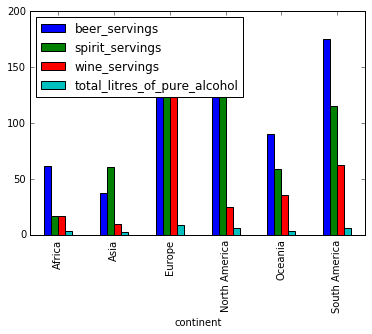

In [91]:
# side-by-side bar plot of the DataFrame directly above
drinks.groupby('continent').mean().plot(kind='bar')

## 13. Exploring a non-numeric Series

In [32]:
# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
display(movies.head())
# examine the data type of each Series
print(movies.dtypes)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


In [94]:
# count the non-null values, unique values, and frequency of the most common value
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [33]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [35]:
movies[['genre','content_rating']].value_counts()

genre      content_rating
Drama      R                 143
Crime      R                  87
Comedy     R                  73
Action     R                  67
Drama      PG-13              55
                            ... 
Film-Noir  APPROVED            1
           NOT RATED           1
           UNRATED             1
Crime      NC-17               1
History    UNRATED             1
Name: count, Length: 95, dtype: int64

## 14. Unique() and nUnique()

In [99]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [100]:
# count the number of unique values in the Series
movies.genre.nunique()

16

## ```15. CrossTab```

In [101]:
# compute a cross-tabulation of two Series
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


Documentation for [**`crosstab`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

## 16. **Exploring a numeric Series**

In [102]:
# calculate various summary statistics
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [103]:
# many statistics are implemented as Series methods
movies.duration.mean()

120.97957099080695

Documentation for [**`mean`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)

In [105]:
# allow plots to appear in the notebook
%matplotlib inline

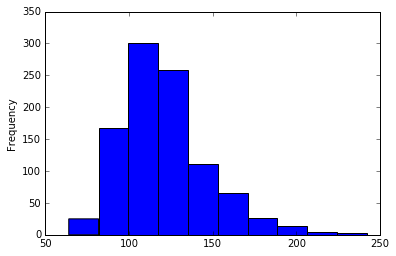

In [106]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies.duration.plot(kind='hist')

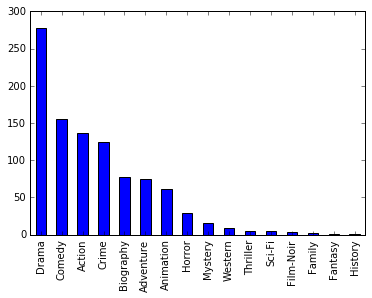

In [107]:
# bar plot of the 'value_counts' for the 'genre' Series
movies.genre.value_counts().plot(kind='bar')

## ```17. Handling Missing Values```

In [55]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


**What does "NaN" mean?**

- "NaN" is not a string, rather it's a special value: **`numpy.nan`**.
- It stands for "Not a Number" and indicates a **missing value**.
- **`read_csv`** detects missing values (by default) when reading the file, and replaces them with this special value.

Documentation for [**`read_csv`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [109]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [110]:
# 'nonnull' returns the opposite of 'isnull' (True if not missing, False if missing)
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


Documentation for [**`isnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html) and [**`notnull`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html)

In [49]:
# count the number of missing values in each Series
ufo.isnull().sum()
# or
ufo.isna().sum()

City                  26
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

This calculation works because:

1. The **`sum`** method for a DataFrame operates on **`axis=0`** by default (and thus produces column sums).
2. In order to add boolean values, pandas converts **`True`** to **1** and **`False`** to **0**.

In [112]:
# use the 'isnull' Series method to filter the DataFrame rows
ufo[ufo.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


**How to handle missing values** depends on the dataset as well as the nature of your analysis. Here are some options:

In [113]:
# examine the number of rows and columns
ufo.shape

(18241, 5)

In [114]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

In [115]:
# 'inplace' parameter for 'dropna' is False by default, thus rows were only dropped temporarily
ufo.shape

(18241, 5)

In [116]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [117]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='any').shape

(15576, 5)

In [118]:
# if 'all' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['City', 'Shape Reported'], how='all').shape

(18237, 5)

In [119]:
# 'value_counts' does not include missing values by default
ufo['Shape Reported'].value_counts().head()

LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
CIRCLE      1365
Name: Shape Reported, dtype: int64

In [120]:
# explicitly include missing values
ufo['Shape Reported'].value_counts(dropna=False).head()

LIGHT       2803
NaN         2644
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

In [121]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [122]:
# confirm that the missing values were filled in
ufo['Shape Reported'].value_counts().head()

VARIOUS     2977
LIGHT       2803
DISK        2122
TRIANGLE    1889
OTHER       1402
Name: Shape Reported, dtype: int64

### 18. Indexing

In [74]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
display(drinks.head())
print(drinks.shape)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


(193, 6)


In [124]:
# every DataFrame has an index (sometimes called the "row labels")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [125]:
# column names are also stored in a special "index" object
drinks.columns

Index([u'country', u'beer_servings', u'spirit_servings', u'wine_servings',
       u'total_litres_of_pure_alcohol', u'continent'],
      dtype='object')

In [127]:
# index and columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**What is the index used for?**

1. identification
2. selection
3. alignment (covered in the next video)

In [17]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America'].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America


In [129]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23, 'beer_servings']

245

In [130]:
# set an existing column as the index
drinks.set_index('country', inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [131]:
# 'country' is now the index
drinks.index

Index([u'Afghanistan', u'Albania', u'Algeria', u'Andorra', u'Angola',
       u'Antigua & Barbuda', u'Argentina', u'Armenia', u'Australia',
       u'Austria',
       ...
       u'Tanzania', u'USA', u'Uruguay', u'Uzbekistan', u'Vanuatu',
       u'Venezuela', u'Vietnam', u'Yemen', u'Zambia', u'Zimbabwe'],
      dtype='object', name=u'country', length=193)

In [134]:
# country name can now be used for selection
drinks.loc['Brazil', 'beer_servings']

245

In [135]:
# index name is optional
drinks.index.name = None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [136]:
# restore the index name, and move the index back to a column
drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


## ```19. Creating dummy variables```

In [225]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 24.1 Using Map function

In [226]:
# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Documentation for [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)

#### 24.2 Using 'get_dummies()"
Generally speaking:

- If you have **"K" possible values** for a categorical feature, you only need **"K-1" dummy variables** to capture all of the information about that feature.
- One convention is to **drop the first dummy variable**, which defines that level as the "baseline".

In [233]:
# reset the DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
# pass the DataFrame to 'get_dummies' and specify which columns to dummy (it drops the original columns)
pd.get_dummies(train, columns=['Sex', 'Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0


In [235]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1.0,0.0,1.0


In [229]:
# add a prefix to identify the source of the dummy variables
pd.get_dummies(train.Sex, prefix='Sex').iloc[:, 1:].head()

,Sex_male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


## ```20. DateTime Operations```

In [76]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [78]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [79]:
# hour could be accessed using string slicing, but this approach breaks too easily
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [80]:
# convert 'Time' to datetime format
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [81]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [82]:
# convenient Series attributes are now available
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [242]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [243]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

API reference for [datetime properties and methods](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [244]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1999')
ts

Timestamp('1999-01-01 00:00:00')

In [245]:
# compare a datetime Series with a timestamp
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [246]:
# perform mathematical operations with timestamps (outputs a timedelta object)
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [247]:
# timedelta objects also have attributes you can access
(ufo.Time.max() - ufo.Time.min()).days

25781L

In [248]:
# allow plots to appear in the notebook
%matplotlib inline

In [249]:
# count the number of UFO reports per year
ufo['Year'] = ufo.Time.dt.year
ufo.Year.value_counts().sort_index().head()

1930    2
1931    2
1933    1
1934    1
1935    1
Name: Year, dtype: int64

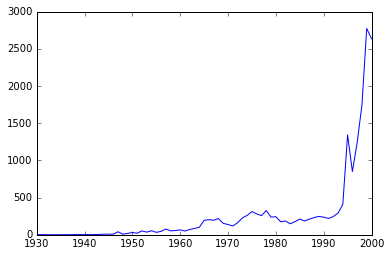

In [250]:
# plot the number of UFO reports per year (line plot is the default)
ufo.Year.value_counts().sort_index().plot()

## 21. Remove duplicate rows

In [83]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, index_col='user_id')
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [252]:
users.shape

(943, 4)

In [253]:
# detect duplicate zip codes: True if an item is identical to a previous item
users.zip_code.duplicated().tail()

user_id
939    False
940     True
941    False
942    False
943    False
Name: zip_code, dtype: bool

In [254]:
# count the duplicate items (True becomes 1, False becomes 0)
users.zip_code.duplicated().sum()

148

In [255]:
# detect duplicate DataFrame rows: True if an entire row is identical to a previous row
users.duplicated().tail()

user_id
939    False
940    False
941    False
942    False
943    False
dtype: bool

In [256]:
# count the duplicate rows
users.duplicated().sum()

7

Logic for [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html):

- **`keep='first'`** (default): Mark duplicates as True except for the first occurrence.
- **`keep='last'`**: Mark duplicates as True except for the last occurrence.
- **`keep=False`**: Mark all duplicates as True.

In [257]:
# examine the duplicate rows (ignoring the first occurrence)
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [258]:
# examine the duplicate rows (ignoring the last occurrence)
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [259]:
# examine the duplicate rows (including all duplicates)
users.loc[users.duplicated(keep=False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [260]:
# drop the duplicate rows (inplace=False by default)
users.drop_duplicates(keep='first').shape

(936, 4)

In [261]:
users.drop_duplicates(keep='last').shape

(936, 4)

In [262]:
users.drop_duplicates(keep=False).shape

(929, 4)

Documentation for [**`drop_duplicates`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html)

In [263]:
# only consider a subset of columns when identifying duplicates
users.duplicated(subset=['age', 'zip_code']).sum()

16

In [264]:
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)

## 22. Apply Function

In [307]:
# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Goal:** Map the existing values of a Series to a different set of values

**Method:** [**`map`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) (Series method)

In [308]:
# map 'female' to 0 and 'male' to 1
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


**Goal:** Apply a function to each element in a Series

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) (Series method)

**Note:** **`map`** can be substituted for **`apply`** in many cases, but **`apply`** is more flexible and thus is recommended

In [309]:
# calculate the length of each string in the 'Name' Series
train['Name_length'] = train.Name.apply(len)
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [310]:
# round up each element in the 'Fare' Series to the next integer
import numpy as np
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [311]:
# we want to extract the last name of each person
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [312]:
# use a string method to split the 'Name' Series at commas (returns a Series of lists)
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [313]:
# define a function that returns an element from a list based on position
def get_element(my_list, position):
    return my_list[position]

In [314]:
# apply the 'get_element' function and pass 'position' as a keyword argument
train.Name.str.split(',').apply(get_element, position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [315]:
# alternatively, use a lambda function
train.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

**Goal:** Apply a function along either axis of a DataFrame

**Method:** [**`apply`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) (DataFrame method)

In [316]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [317]:
# select a subset of the DataFrame to work with
drinks.loc[:, 'beer_servings':'wine_servings'].head()

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [318]:
# apply the 'max' function along axis 0 to calculate the maximum value in each column
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [319]:
# apply the 'max' function along axis 1 to calculate the maximum value in each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [320]:
# use 'np.argmax' to calculate which column has the maximum value for each row
drinks.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head()

0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

**Goal:** Apply a function to every element in a DataFrame

**Method:** [**`applymap`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html) (DataFrame method)

In [321]:
# convert every DataFrame element into a float
drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


In [322]:
# overwrite the existing DataFrame columns
drinks.loc[:, 'beer_servings':'wine_servings'] = drinks.loc[:, 'beer_servings':'wine_servings'].applymap(float)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


## 23. Aggregate Functions

In [24]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [29]:
drinks[['beer_servings','spirit_servings','wine_servings']].agg(['mean','min','max'])

,beer_servings,spirit_servings,wine_servings
mean,106.160622,80.994819,49.450777
min,0.000000,0.000000,0.000000
max,376.000000,438.000000,370.000000


In [31]:
drinks[['beer_servings','spirit_servings','wine_servings']].agg(
    {
        'beer_servings': ['min', 'max'],
        'spirit_servings': ['mean'],
        'wine_servings': ['min', 'max']
    }
)

,beer_servings,spirit_servings,wine_servings
min,0.0,NaN,0.0
max,376.0,NaN,370.0
mean,NaN,80.994819,NaN


## 24. Rank, shift, cumsum functions

In [36]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [41]:
drinks[['total_litres_of_pure_alcohol']].rank(method = 'dense').head()

,total_litres_of_pure_alcohol
0,1.0
1,40.0
2,8.0
3,88.0
4,47.0


In [42]:
drinks[['total_litres_of_pure_alcohol']].rank(method = 'first').head()

,total_litres_of_pure_alcohol
0,1.0
1,104.0
2,35.0
3,191.0
4,116.0


In [43]:
drinks[['total_litres_of_pure_alcohol']].shift(1).head()

,total_litres_of_pure_alcohol
0,NaN
1,0.0
2,4.9
3,0.7
4,12.4


In [44]:
drinks[['total_litres_of_pure_alcohol']].shift(3, fill_value = 100).head()

,total_litres_of_pure_alcohol
0,100.0
1,100.0
2,100.0
3,0.0
4,4.9


In [45]:
df_cumsum = drinks[['total_litres_of_pure_alcohol']]
df_cumsum['total_litres_of_pure_alcohol_NEW'] = drinks[['total_litres_of_pure_alcohol']].cumsum()
df_cumsum.head(5)

,total_litres_of_pure_alcohol,total_litres_of_pure_alcohol_NEW
0,0.0,0.0
1,4.9,4.9
2,0.7,5.6
3,12.4,18.0
4,5.9,23.9


## 25. Rolling Window Functions

In [46]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [47]:
drinks[['beer_servings']].rolling(window = 5).mean()

,beer_servings
0,NaN
1,NaN
2,NaN
3,NaN
4,115.2
...,...
188,148.6
189,121.0
190,99.2
191,100.6


## 26. Concat()

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [3]:
df1 = drinks[drinks['beer_servings']<=100].reset_index()
df2 = drinks[drinks['beer_servings']>=250].reset_index()

In [4]:
new_df = pd.concat([df1, df2])
print(df1.shape, df2.shape, new_df.shape)

(114, 7) (21, 7) (135, 7)


## 27. Merge dataframes

* df1.append(df2): stacking vertically
* pd.concat([df1, df2]):
    * stacking many horizontally or vertically
    * simple inner/outer joins on Indexes
* df1.join(df2): inner/outer/left/right joins on Indexes
* pd.merge(df1, df2): many joins on multiple columns

In [5]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()
df1 = drinks[drinks['beer_servings']<=100].reset_index()
df2 = drinks[drinks['beer_servings']>=250].reset_index()

In [6]:
df1.merge(df2, how="left").head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0,0,0,0.0,Asia
1,1,Albania,89,132,54,4.9,Europe
2,2,Algeria,25,0,14,0.7,Africa
3,7,Armenia,21,179,11,3.8,Europe
4,10,Azerbaijan,21,46,5,1.3,Europe


In [7]:
df1.merge(df2, how="right").head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,8,Australia,261,72,212,10.4,Oceania
1,9,Austria,279,75,191,9.7,Europe
2,16,Belgium,295,84,212,10.5,Europe
3,17,Belize,263,114,8,6.8,North America
4,45,Czech Republic,361,170,134,11.8,Europe


In [8]:
df1.merge(df2, how="outer").head()

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0,0,0,0.0,Asia
1,1,Albania,89,132,54,4.9,Europe
2,2,Algeria,25,0,14,0.7,Africa
3,7,Armenia,21,179,11,3.8,Europe
4,10,Azerbaijan,21,46,5,1.3,Europe


In [9]:
pd.merge(df1, df2, on=['continent']).head()

,index_x,country_x,beer_servings_x,spirit_servings_x,wine_servings_x,total_litres_of_pure_alcohol_x,continent,index_y,country_y,beer_servings_y,spirit_servings_y,wine_servings_y,total_litres_of_pure_alcohol_y
0,1,Albania,89,132,54,4.9,Europe,9,Austria,279,75,191,9.7
1,1,Albania,89,132,54,4.9,Europe,16,Belgium,295,84,212,10.5
2,1,Albania,89,132,54,4.9,Europe,45,Czech Republic,361,170,134,11.8
3,1,Albania,89,132,54,4.9,Europe,60,Finland,263,133,97,10.0
4,1,Albania,89,132,54,4.9,Europe,65,Germany,346,117,175,11.3


## 28. Joins
There are actually four types of joins supported by the Pandas merge function. Here's how they are described by the documentation:

inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically
left: use only keys from left frame, similar to a SQL left outer join; preserve key order
right: use only keys from right frame, similar to a SQL right outer join; preserve key order
The default is the "inner join", which was used when creating the movie_ratings DataFrame.

It's easiest to understand the different types by looking at some simple examples:

#### Example DataFrames A and B

In [11]:
A = pd.DataFrame({'color': ['green', 'yellow', 'red'], 'num':[1, 2, 3]})
A

,color,num
0,green,1
1,yellow,2
2,red,3


In [12]:
B = pd.DataFrame({'color': ['green', 'yellow', 'pink'], 'size':['S', 'M', 'L']})
B

,color,size
0,green,S
1,yellow,M
2,pink,L


#### 28.1 Inner join

In [13]:
#Only include observations found in both A and B:
pd.merge(A, B, how='inner')

,color,num,size
0,green,1,S
1,yellow,2,M


#### 28.2 Outer join

In [14]:
#Include observations found in either A or B:
pd.merge(A, B, how='outer')

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,red,3.0,NaN
3,pink,NaN,L


#### 28.3 Left join

In [15]:
#Include all observations found in A:
pd.merge(A, B, how='left')

,color,num,size
0,green,1,S
1,yellow,2,M
2,red,3,NaN


#### 28.4 Right join

In [16]:
#Include all observations found in B:
pd.merge(A, B, how='right')

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,pink,NaN,L
